Objectifs :

- Agréger les données de la variable "catv" (catégorie de véhicule) selon les grandes catégories de véhicules afin de créer la variable "permis" et analyser sa distribution,
- Examiner le nombre d'occupants par catégorie de véhicules.

In [ ]:
# Importation des packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
%matplotlib inline

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

<h1>Importation des jeux de données</h1>

In [ ]:
vehicule = pd.read_csv('vehicules.csv', low_memory=False)
vehicule.head()

,Unnamed: 0,num_acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,annee,id_vehicule,motor
0,1,200500000001,0.0,7,0.0,0.0,2.0,1.0,1.0,A01,2005,NaN,NaN
1,2,200500000001,0.0,7,0.0,0.0,2.0,8.0,10.0,B02,2005,NaN,NaN
2,3,200500000002,0.0,7,0.0,0.0,2.0,7.0,16.0,A01,2005,NaN,NaN
3,4,200500000002,0.0,2,0.0,0.0,2.0,1.0,1.0,B02,2005,NaN,NaN
4,5,200500000003,0.0,2,0.0,0.0,2.0,1.0,1.0,A01,2005,NaN,NaN


<h1>Description des variables</h1>

In [ ]:
vehicule.drop('Unnamed: 0', axis=1, inplace=True)
vehicule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914902 entries, 0 to 1914901
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   num_acc      int64  
 1   senc         float64
 2   catv         int64  
 3   occutc       float64
 4   obs          float64
 5   obsm         float64
 6   choc         float64
 7   manv         float64
 8   num_veh      object 
 9   annee        int64  
 10  id_vehicule  object 
 11  motor        float64
dtypes: float64(7), int64(3), object(2)
memory usage: 175.3+ MB


In [ ]:
# Maintien du type de num_acc et transformation des variables senc, catv, obs, obsm, chox, manv et motor en category
vehicule[['senc','catv','obs','obsm','choc','manv','motor']] = vehicule[['senc','catv','obs','obsm','choc','manv','motor']].astype('category')

# Vérification du type des variables senc, catv, obs, obsm, chox, manv et motor
assert all(vehicule[col].dtype == 'category' for col in ['senc','catv','obs','obsm','choc','manv','motor'])
vehicule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914902 entries, 0 to 1914901
Data columns (total 12 columns):
 #   Column       Dtype   
---  ------       -----   
 0   num_acc      int64   
 1   senc         category
 2   catv         category
 3   occutc       float64 
 4   obs          category
 5   obsm         category
 6   choc         category
 7   manv         category
 8   num_veh      object  
 9   annee        int64   
 10  id_vehicule  object  
 11  motor        category
dtypes: category(7), float64(1), int64(2), object(2)
memory usage: 85.8+ MB


<h1>Recherche des valeurs manquantes</h1>

In [ ]:
vehicule.isnull().sum()

num_acc              0
senc               272
catv                 0
occutc          276834
obs               1006
obsm               778
choc               397
manv               468
num_veh              0
annee                0
id_vehicule    1635811
motor          1635811
dtype: int64

In [ ]:
# Calcul du pourcentage de valeurs manquantes par colonne du dataframe "Vehicule"
missing_percentages = vehicule.isnull().sum() / len(vehicule) * 100
missing_percentages = missing_percentages.sort_values(ascending=False)  # Tri par ordre décroissant
print(missing_percentages)

id_vehicule    85.425312
motor          85.425312
occutc         14.456823
obs             0.052535
obsm            0.040629
manv            0.024440
choc            0.020732
senc            0.014204
num_acc         0.000000
catv            0.000000
num_veh         0.000000
annee           0.000000
dtype: float64


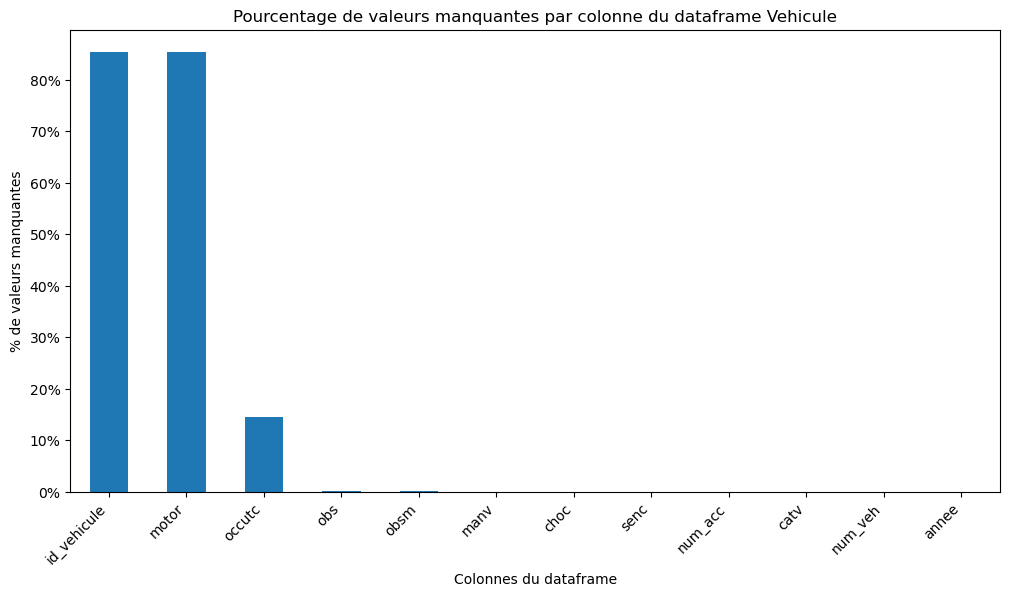

In [ ]:
# Graphique représentant le pourcentage de valeurs manquantes par colonne du dataframe "Vehicule"
plt.figure(figsize=(12, 6))
missing_percentages.plot(kind='bar')
plt.title("Pourcentage de valeurs manquantes par colonne du dataframe Vehicule")
plt.xlabel("Colonnes du dataframe")
plt.ylabel('% de valeurs manquantes')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes des colonnes
plt.gca().yaxis.set_major_formatter('{:.0f}%'.format)  # Format des étiquettes de l'axe des ordonnées
plt.show()

In [ ]:
import missingno as msno ## Plot nullity matrix of Vehicule fig = msno.matrix(Vehicule)

<AxesSubplot:>

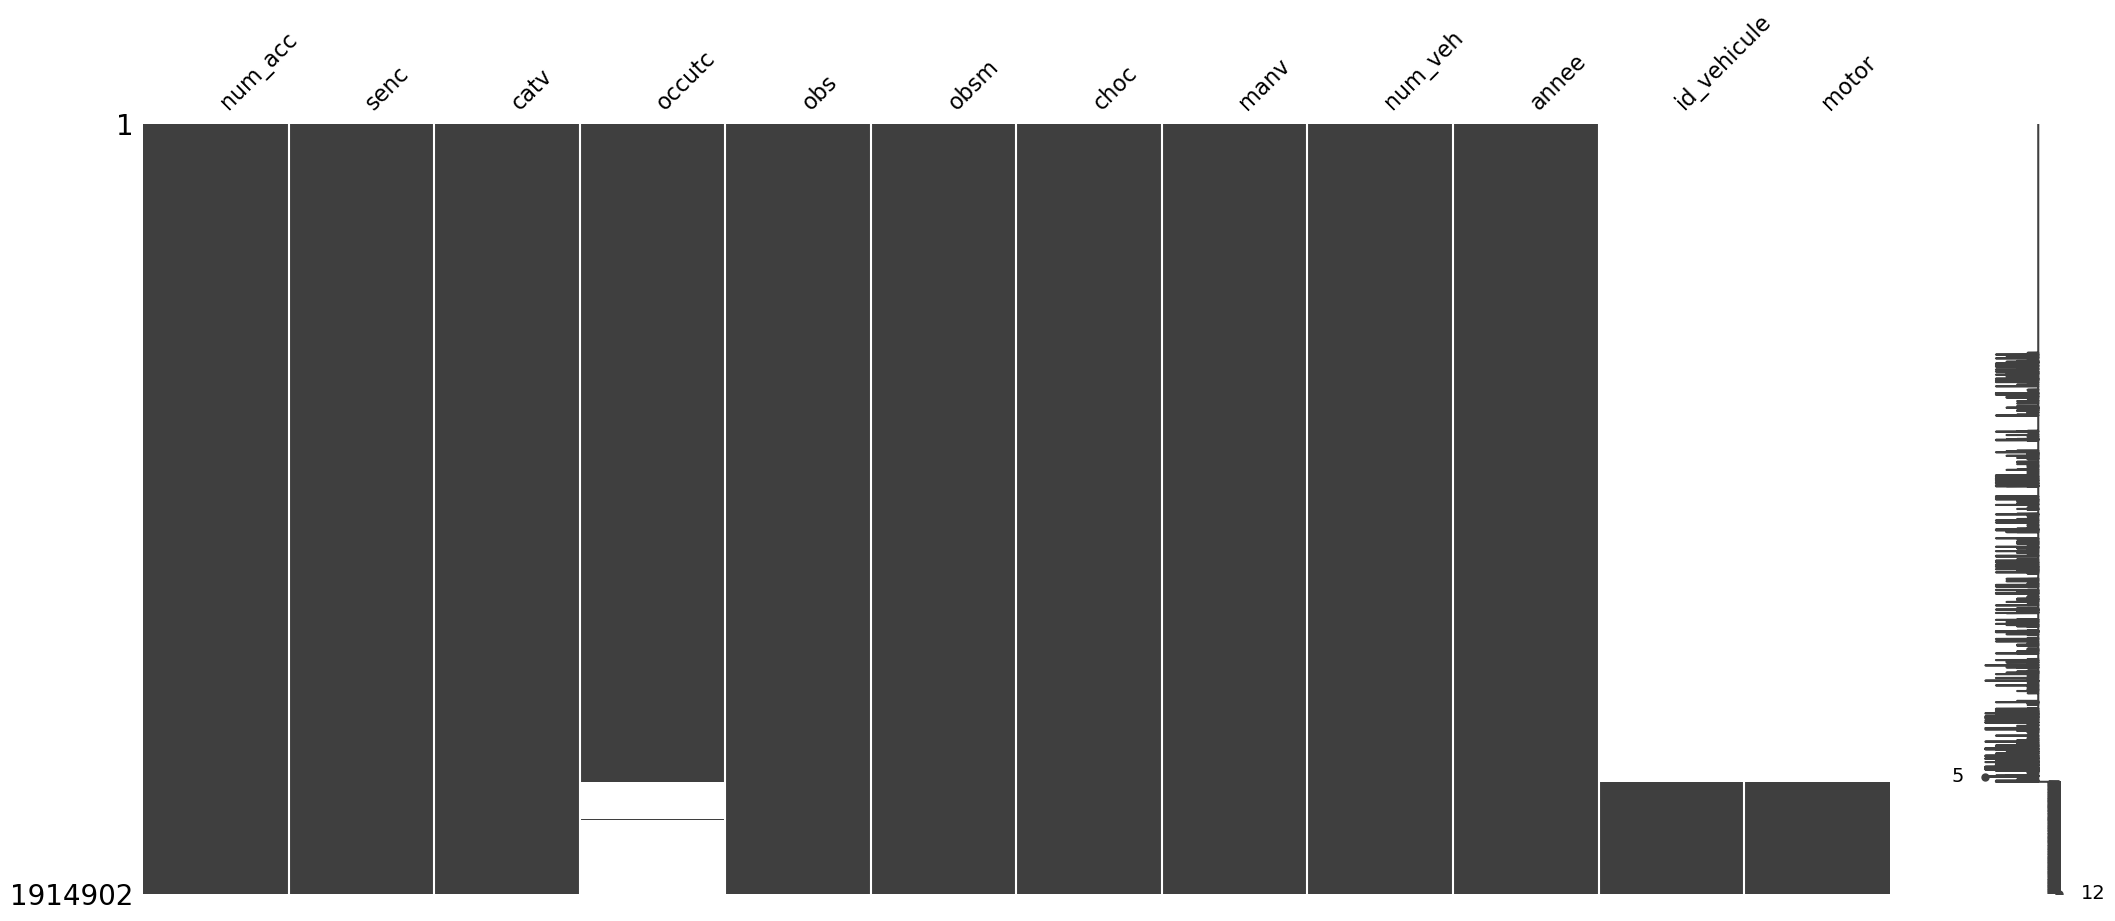

In [ ]:
# Affichage de la matrice de nullité :
msno.matrix(vehicule)

<h1>Distribution de la variable "catv" (Catégorie de véhicules):</h1>

<h2>Variable 'catv' : Liste des modalités</h2><br>

00 – Indéterminable<br>
01 – Bicyclette<br>
02 – Cyclomoteur <50cm3<br>
03 – Voiturette (Quadricycle à moteur carrossé) (anciennement "voiturette ou tricycle à moteur")<br>
04 – Référence inutilisée depuis 2006 (scooter immatriculé)<br>
05 – Référence inutilisée depuis 2006 (motocyclette)<br>
06 – Référence inutilisée depuis 2006 (side-car)<br>
07 – VL seul<br>
08 – Référence inutilisée depuis 2006 (VL + caravane)<br>
09 – Référence inutilisée depuis 2006 (VL + remorque)<br>
10 – VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC
<= 3,5T)<br>
11 – Référence inutilisée depuis 2006 (VU (10) + caravane)<br>
12 – Référence inutilisée depuis 2006 (VU (10) + remorque)<br>
13 – PL seul 3,5T <PTCA <= 7,5T<br>
14 – PL seul > 7,5T<br>
15 – PL > 3,5T + remorque<br>
16 – Tracteur routier seul<br>
17 – Tracteur routier + semi-remorque<br>
18 – Référence inutilisée depuis 2006 (transport en commun)<br>
19 – Référence inutilisée depuis 2006 (tramway)<br>
20 – Engin spécial<br>
21 – Tracteur agricole<br>
30 – Scooter < 50 cm3<br>
31 – Motocyclette > 50 cm3 et <= 125 cm3<br>
32 – Scooter > 50 cm3 et <= 125 cm3<br>
33 – Motocyclette > 125 cm3<br>
34 – Scooter > 125 cm3<br>
35 – Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé)<br>
36 – Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé)<br>
37 – Autobus<br>
38 – Autocar<br>
39 – Train<br>
40 – Tramway<br>
41 – 3RM <= 50 cm3<br>
42 – 3RM > 50 cm3 <= 125 cm3<br>
43 – 3RM > 125 cm3<br>
50 – EDP à moteur<br>
60 – EDP sans moteur<br>
80 – VAE<br>
99 – Autre véhicule<br>

In [ ]:
vehicule['catv'].value_counts()

7     1182228
33     136738
10     100574
2       98409
1       83565
30      74315
32      39488
31      38736
5       21816
34      20219
14      19109
15      16378
17      15327
37      12332
99       7878
3        7566
4        7463
13       7243
21       3942
38       3316
50       3029
36       2401
40       2180
18       2075
20       2073
43       1383
80       1113
16        864
0         757
60        553
35        506
39        474
9         300
19        183
8         120
12         79
42         65
41         40
6          39
11         17
-1          9
Name: catv, dtype: int64

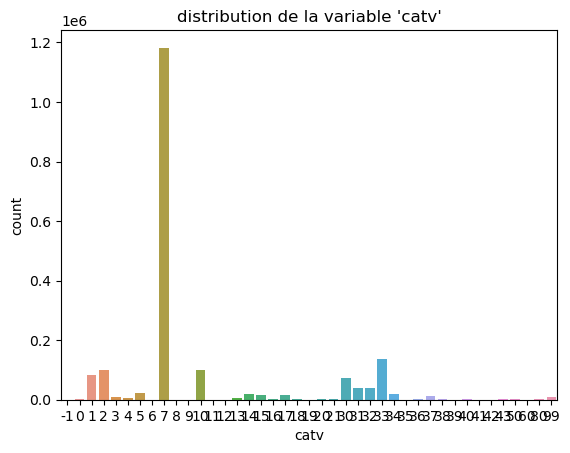

In [ ]:
sns.countplot(x='catv', data=vehicule)
plt.title("distribution de la variable 'catv'");

La grande majorité des accidents concerne des véhicules légers, principalement des voitures. Il existe de nombreuses catégories définies, dont certaines ne sont plus utilisées. Il serait judicieux de simplifier <b>en regroupant certaines catégories</b>.

In [ ]:
# Visualisation de la liste des valeurs uniques présentes dans la colonne 'catv'
catv_uniques = vehicule['catv'].unique()
print(catv_uniques)

[7, 2, 9, 5, 18, ..., 60, 0, 43, 41, -1]
Length: 41
Categories (41, int64): [-1, 0, 1, 2, ..., 50, 60, 80, 99]


In [ ]:
# Convertion la valeur -1 de la colonne 'catv' en NaN
vehicule['catv'].replace("-1", np.nan, inplace=True)
count = vehicule['catv'].value_counts()
print(count)

7     1182228
33     136738
10     100574
2       98409
1       83565
30      74315
32      39488
31      38736
5       21816
34      20219
14      19109
15      16378
17      15327
37      12332
99       7878
3        7566
4        7463
13       7243
21       3942
38       3316
50       3029
36       2401
40       2180
18       2075
20       2073
43       1383
80       1113
16        864
0         757
60        553
35        506
39        474
9         300
19        183
8         120
12         79
42         65
41         40
6          39
11         17
-1          9
Name: catv, dtype: int64


In [ ]:
# Convertir les valeurs de la colonne 'catv' en chaînes de caractères pour permettre l'affichage du nom de chaque catégorie de véhicule
vehicule['catv'] = vehicule['catv'].astype(str)

# Regroupement des valeurs de la variable "catv" par type de véhicule :

In [ ]:
# Regroupement par type de véhicule pour la variable catv
correspondances = {'0': 'Indéterminable',
    '1': 'Bicyclette',
    '2': 'Deux ou trois roues de petite cylindrée (<= 50 cm3)',
    '3': 'Voiturette',
    '4': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '5': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '6': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '7': 'Voitures légères (VL) seule',
    '8': 'Voitures légères (VL) avec carane ou remorque tractée',
    '9': 'Voitures légères (VL) avec carane ou remorque tractée',
    '10': 'Véhicules utilitaires légers (VU)',
    '11': 'Véhicules utilitaires légers (VU) avec carane ou remorque tractée',
    '12': 'Véhicules utilitaires légers (VU) avec carane ou remorque tractée',
    '13': 'Poids lourds (PL) et camions',
    '14': 'Poids lourds (PL) et camions',
    '15': 'Poids lourds (PL) et camions',
    '16': 'Tracteurs routiers',
    '17': 'Tracteurs routiers',
    '18': 'Autobus et autocars',
    '19': 'Tramway',
    '20': 'Tracteurs agricoles et engins spéciaux',
    '21': 'Tracteurs agricoles et engins spéciaux',
    '30': 'Deux ou trois roues de petite cylindrée (<= 50 cm3)',
    '31': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '32': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '33' : 'Deux ou trois roues-motrices de grosse cylindrée (>125 cm3)',
    '34': 'Deux ou trois roues-motrices de grosse cylindrée (>125 cm3)',
    '35': 'Quad',
    '36': 'Quad',
    '37': 'Autobus et autocars',
    '38': 'Autobus et autocars',
    '39': 'Train',
    '40': 'Tramway',
    '41': 'Deux ou trois roues de petite cylindrée (<= 50 cm3)',
    '42': 'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
    '43': 'Deux ou trois roues-motrices de grosse cylindrée (>125 cm3)',
    '50': 'Engins de déplacement personnels (EDP) à moteur (ex: trotinette)',
    '60': "Engins de déplacement personnels (EDP) sans moteur (ex : skateboards, roller, trottinette)",
    '80': 'Vélo avec assistance électrique (VAE)',
    '99': 'Autre véhicule'}

# Création d'une nouvelle colonne catv_Label pour intégrer les regroupements effectués mais sans écraser les valeurs de la variable catv
vehicule['catv_Label'] = vehicule['catv'].map(correspondances)

# Affichage du résultat
print(vehicule['catv_Label'])

0                                Voitures légères (VL) seule
1                                Voitures légères (VL) seule
2                                Voitures légères (VL) seule
3          Deux ou trois roues de petite cylindrée (<= 50...
4          Deux ou trois roues de petite cylindrée (<= 50...
                                 ...                        
1914897                          Voitures légères (VL) seule
1914898                          Voitures légères (VL) seule
1914899                          Voitures légères (VL) seule
1914900                          Voitures légères (VL) seule
1914901                          Voitures légères (VL) seule
Name: catv_Label, Length: 1914902, dtype: object


In [ ]:
vehicule['catv_Label'].dtype

dtype('O')

In [ ]:
vehicule['catv_Label'] = vehicule['catv_Label'].astype('category')
assert vehicule['catv_Label'].dtype == 'category'

In [ ]:
vehicule['catv_Label'].cat.categories

Index(['Autobus et autocars', 'Autre véhicule', 'Bicyclette',
       'Deux ou trois roues de petite cylindrée (<= 50 cm3)',
       'Deux ou trois roues-motrices de grosse cylindrée (>125 cm3)',
       'Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)',
       'Engins de déplacement personnels (EDP) sans moteur (ex : skateboards, roller, trottinette)',
       'Engins de déplacement personnels (EDP) à moteur (ex: trotinette)',
       'Indéterminable', 'Poids lourds (PL) et camions', 'Quad',
       'Tracteurs agricoles et engins spéciaux', 'Tracteurs routiers', 'Train',
       'Tramway', 'Voitures légères (VL) avec carane ou remorque tractée',
       'Voitures légères (VL) seule', 'Voiturette',
       'Véhicules utilitaires légers (VU)',
       'Véhicules utilitaires légers (VU) avec carane ou remorque tractée',
       'Vélo avec assistance électrique (VAE)'],
      dtype='object')

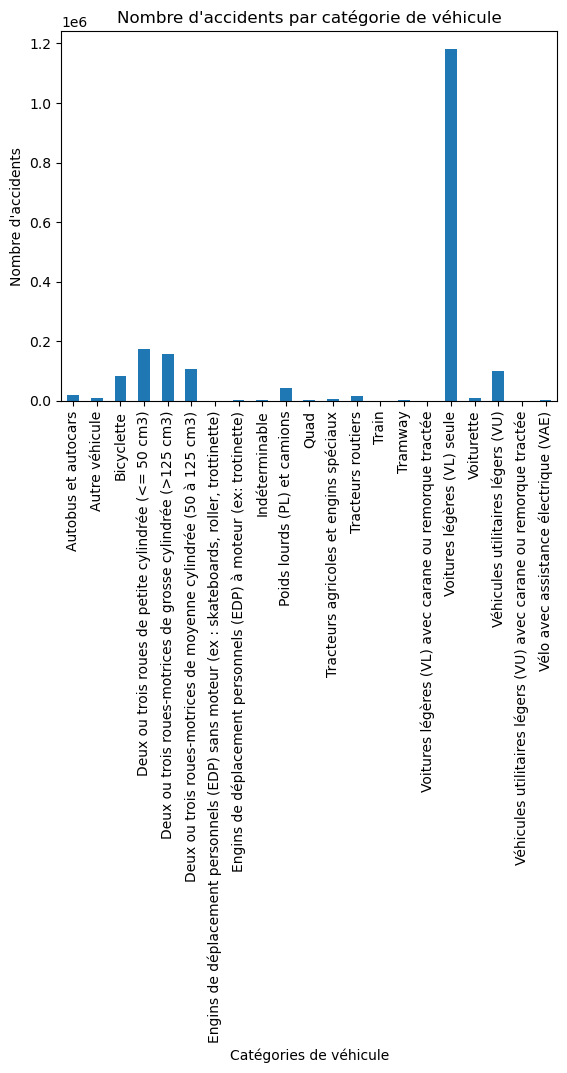

In [ ]:
# Le nbre d'accidents par chaque type de véhicule (catv)
counts = vehicule['catv_Label'].value_counts()

# Tri par type de vehicule
counts = counts.sort_index()

# Distribution des types de vehicule sous forme de graphe
counts.plot(kind='bar')

plt.title("Nombre d'accidents par catégorie de véhicule")
plt.xlabel('Catégories de véhicule')
plt.ylabel("Nombre d'accidents")

plt.show()

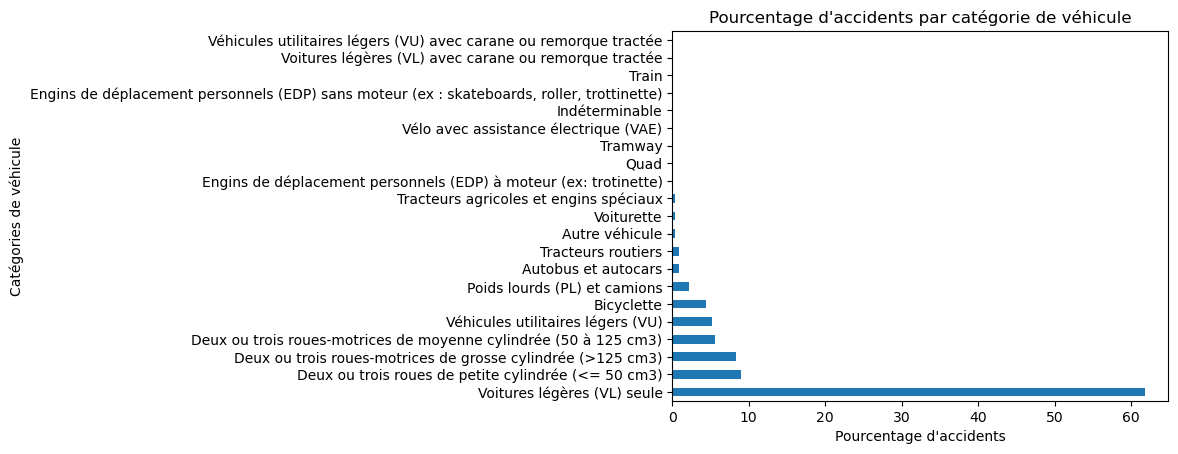

In [ ]:
percentages = (vehicule['catv_Label'].value_counts(normalize=True) * 100).sort_values(ascending=False)

# Distribution des types de véhicule sous forme de graphe
percentages.plot(kind='barh')  # Utilisation de 'barh' pour obtenir une rotation

plt.title("Pourcentage d'accidents par catégorie de véhicule")
plt.xlabel("Pourcentage d'accidents")
plt.ylabel('Catégories de véhicule')

plt.show()

# Définition des catégories de permis par type de véhicule :

Catégorie de permis nécessaire pour conduire chaque type de véhicule :

01 – Bicyclette : Aucun permis requis.

02 – Cyclomoteur <50cm3 : Permis AM ou permis B.

03 – Voiturette (Quadricycle à moteur carrossé) : Permis B1.

04 – Référence inutilisée depuis 2006 (scooter immatriculé) :
Permis A1 (permis moto léger) ou Permis A2 (permis moto intermédiaire) ou Permis A (permis moto toutes catégories) en fonction de la cylindrée du scooter.

05 – Référence inutilisée depuis 2006 (motocyclette) :
Permis A1 (permis moto léger) pour les motocyclettes de puissance limitée, Permis A2 (permis moto intermédiaire) pour les motocyclettes de puissance intermédiaire, Permis A (permis moto toutes catégories) pour les motocyclettes de puissance illimitée.

06 – Référence inutilisée depuis 2006 (side-car) :  
Permis A1 (permis moto léger) ou Permis A2 (permis moto intermédiaire) ou Permis A (permis moto toutes catégories) en fonction de la puissance du side-car.

07 – VL seul : Permis B.

08 – Référence inutilisée depuis 2006 (VL + caravane) :
*** Si le PTAC du véhicule combiné est inférieur ou égal à 3,5 tonnes, le permis B est suffisant. Le permis B permet de conduire les voitures légères et les véhicules avec une remorque dont le PTAC ne dépasse pas 750 kg ou lorsque la somme du PTAC du véhicule tracteur et de la remorque ne dépasse pas 3,5 tonnes.
*** Cependant, si le PTAC (poids total en charge) du véhicule combiné dépasse 3,5 tonnes, un permis spécifique est nécessaire. Dans ce cas, il peut être requis d'obtenir un permis de conduire de la catégorie B+E, qui autorise la conduite d'un véhicule léger avec une remorque dont le PTAC dépasse 750 kg et dont la somme du PTAC du véhicule tracteur et de la remorque dépasse 3,5 tonnes.

09 – Référence inutilisée depuis 2006 (VL + remorque) :
*** Si le PTAC du véhicule combiné est inférieur ou égal à 3,5 tonnes, le permis B est suffisant. Le permis B permet de conduire les voitures légères et les véhicules avec une remorque dont le PTAC ne dépasse pas 750 kg ou lorsque la somme du PTAC du véhicule tracteur et de la remorque ne dépasse pas 3,5 tonnes.
*** Cependant, si le PTAC (poids total en charge) du véhicule combiné dépasse 3,5 tonnes, un permis spécifique est nécessaire. Dans ce cas, il peut être requis d'obtenir un permis de conduire de la catégorie B+E, qui autorise la conduite d'un véhicule léger avec une remorque dont le PTAC dépasse 750 kg et dont la somme du PTAC du véhicule tracteur et de la remorque dépasse 3,5 tonnes.

10 – VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque : Permis B.

11 – Référence inutilisée depuis 2006 (VU (10) + caravane) : cf. 08 et 09

12 – Référence inutilisée depuis 2006 (VU (10) + remorque) : cf. 08 et 09

13 – PL seul 3,5T <PTCA <= 7,5T : Permis C1.

14 – PL seul > 7,5T : Permis C.

15 – PL > 3,5T + remorque : Permis C.

16 – Tracteur routier seul : Permis CE.

17 – Tracteur routier + semi-remorque : Permis CE.

18 – Référence inutilisée depuis 2006 (transport en commun) :
Le permis D est spécifique aux conducteurs de véhicules de transport en commun. Il permet de conduire des véhicules de plus de 8 places assises (en plus du conducteur) et dont la capacité de transport dépasse 16 personnes.

19 – Référence inutilisée depuis 2006 (tramway) : Permis B

20 – Engin spécial : Permis B ou permis C selon la catégorie.

21 – Tracteur agricole : Permis B ou permis C selon la catégorie.

30 – Scooter < 50 cm3 : Permis AM (anciennement BSR) ou permis B.

31 – Motocyclette > 50 cm3 et <= 125 cm3 : Permis A1 ou permis A2.

32 – Scooter > 50 cm3 et <= 125 cm3 : Permis A1 ou permis A2.

33 – Motocyclette > 125 cm3 : Permis A.

34 – Scooter > 125 cm3 : Permis A.

35 – Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé) : Permis AM ou permis B.

36 – Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé) : Permis A ou permis B avec formation complémentaire.

37 – Autobus : Permis D.

38 – Autocar : Permis D.

39 – Train : Accréditation spécifique

40 – Tramway : Permis B.

41 – 3RM <= 50 cm3 : Permis AM ou permis B.

42 – 3RM > 50 cm3 <= 125 cm3 : Permis A1 ou permis A2.

43 – 3RM > 125 cm3 : Permis A.

50 – EDP à moteur : Permis B ou permis C selon la catégorie

60 – EDP sans moteur : Aucun permis

80 – VAE : : Aucun permis

99 – Autre véhicule : permis selon la catégorie

**En résumé, catégorie de permis nécessaire pour conduire chaque type de véhicule :**

01 : Aucun permis

02 : Permis AM ou B

03 : Permis B1

04 :  Permis A1 ou A2 ou A

05 : Permis A1 ou A2 ou A

06 : Permis A1 ou A

07 : Permis B

08 : Permis B ou B+E  

09 : Permis B ou B+E

10 : Permis B

11 : Permis B ou B+E

12 : Permis B ou B+E  

13 : Permis C1

14 : Permis C

15 : Permis C

16 : Permis CE

17 : Permis CE

18 : Permis D

19 : Permis B

20 : Permis B ou C

21 : Permis B ou C

30 : Permis AM ou B

31 : Permis A1 ou A2

32 : Permis A1 ou A2

33 : Permis A

34 : Permis A

35 : Permis AM ou B

36 : Permis AM ou B avec formation complémentaire

37 : Permis D

38 : Permis D

39 : Accréditation spécifique

40 : Permis B

41 : Permis AM ou permis B

42 : Permis A1 ou A2

43 : Permis A

50 : Permis B ou C

60 : Aucun permis

80 : Aucun permis

99 : Permis selon la catégorie


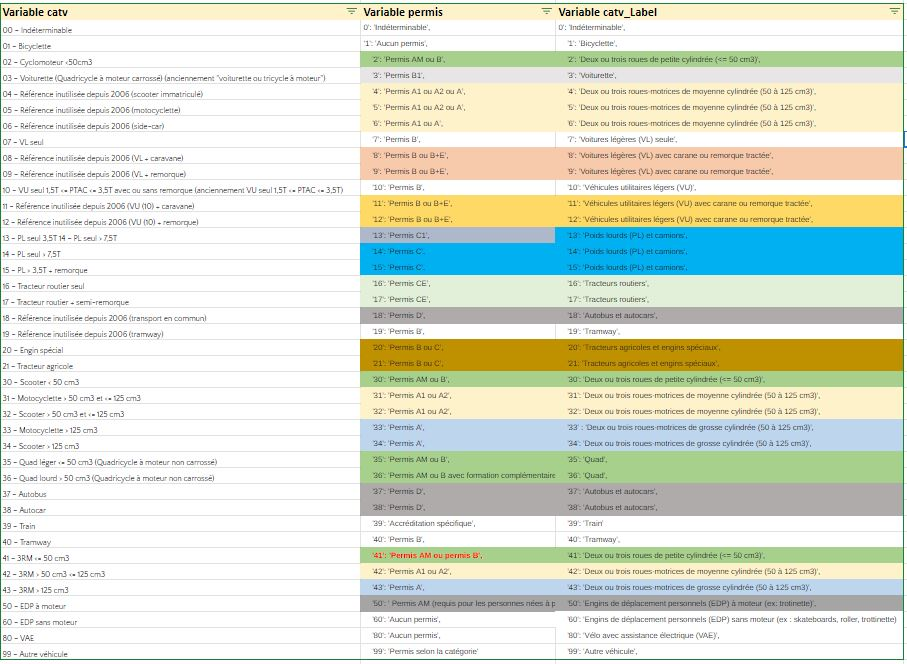

# Création de la variable "permis" :

In [ ]:
correspondances = {
    '1': 'Aucun permis',
    '2': 'Permis AM ou B',
    '3': 'Permis B1',
    '4': 'Permis A1 ou A2 ou A',
    '5': 'Permis A1 ou A2 ou A',
    '6': 'Permis A1 ou A',
    '7': 'Permis B',
    '8': 'Permis B ou B+E',
    '9': 'Permis B ou B+E',
    '10': 'Permis B',
    '11': 'Permis B ou B+E',
    '12': 'Permis B ou B+E',
    '13': 'Permis C1',
    '14': 'Permis C',
    '15': 'Permis C',
    '16': 'Permis CE',
    '17': 'Permis CE',
    '18': 'Permis D',
    '19': 'Permis B',
    '20': 'Permis B ou C',
    '21': 'Permis B ou C',
    '30': 'Permis AM ou B',
    '31': 'Permis A1 ou A2',
    '32': 'Permis A1 ou A2',
    '33': 'Permis A',
    '34': 'Permis A',
    '35': 'Permis AM ou B',
    '36': 'Permis AM ou B avec formation complémentaire',
    '37': 'Permis D',
    '38': 'Permis D',
    '39': 'Accréditation spécifique',
    '40': 'Permis B',
    '41': 'Permis AM ou B',
    '42': 'Permis A1 ou A2',
    '43': 'Permis A',
    '50': 'Permis B ou C',
    '60': 'Aucun permis',
    '80': 'Aucun permis',
    '99': 'Permis selon la catégorie'
}

vehicule['permis'] = vehicule['catv'].replace(correspondances)


In [ ]:
vehicule['permis'].dtype

dtype('O')

In [ ]:
vehicule['permis'] = vehicule['permis'].astype('category')
assert vehicule['permis'].dtype == 'category'

In [ ]:
vehicule['permis'].cat.categories

Index(['-1', '0', 'Accréditation spécifique', 'Aucun permis', 'Permis A',
       'Permis A1 ou A', 'Permis A1 ou A2', 'Permis A1 ou A2 ou A',
       'Permis AM ou B', 'Permis AM ou B avec formation complémentaire',
       'Permis B', 'Permis B ou B+E', 'Permis B ou C', 'Permis B1', 'Permis C',
       'Permis C1', 'Permis CE', 'Permis D', 'Permis selon la catégorie'],
      dtype='object')

# Distribution de la nouvelle variable "permis" :

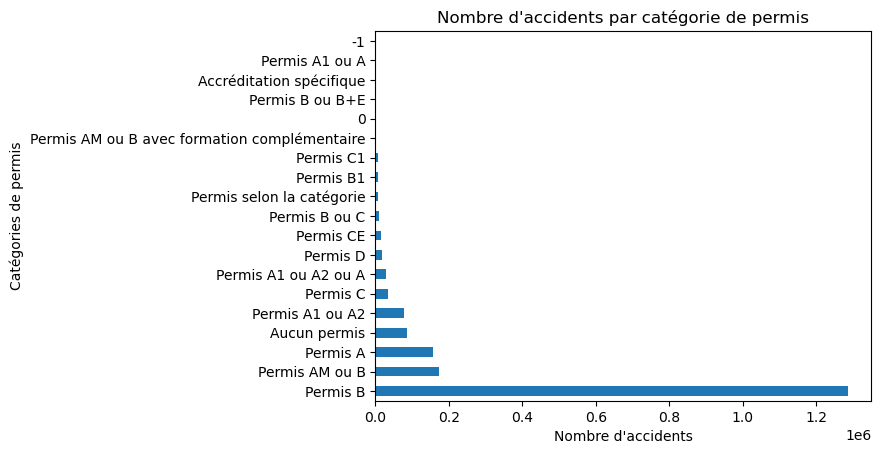

In [ ]:
counts = vehicule['permis'].value_counts()

# Tri par catégorie de permis et ordre décroissant
counts = counts.sort_values(ascending=False)

# Distribution des catégories de permis sous forme de graphe
counts.plot(kind='barh')

plt.title("Nombre d'accidents par catégorie de permis")
plt.xlabel("Nombre d'accidents")
plt.ylabel('Catégories de permis')

plt.show()


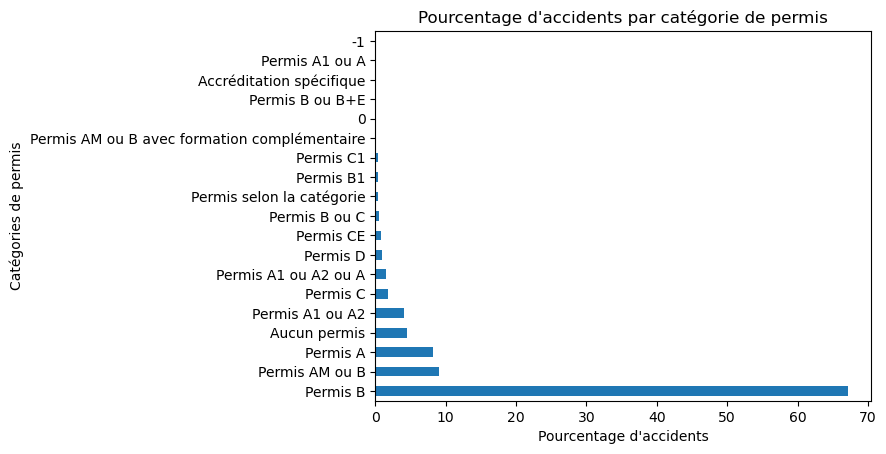

In [ ]:
percentages = (vehicule['permis'].value_counts(normalize=True) * 100).sort_values(ascending=False)

# Distribution des catégories de permis sous forme de graphe
percentages.plot(kind='barh')

plt.title("Pourcentage d'accidents par catégorie de permis")
plt.xlabel("Pourcentage d'accidents")
plt.ylabel('Catégories de permis')

plt.show()



# Exploration du nombre d'occupants pas catégorie de véhicule :

In [ ]:
# Nombre d'occupants par catégorie de vehicule
occupants_par_catv = vehicule.groupby('catv')['occutc'].apply(lambda x: x.isnull().sum())
occupants_par_catv = occupants_par_catv.sort_values(ascending=False)
print(occupants_par_catv)

catv
7     165407
33     22057
10     18834
1      15636
2      10778
30      9005
32      6542
31      5111
34      3170
50      3029
15      2736
17      2076
14      2070
3       1787
43      1383
99      1317
80      1113
13      1093
0        757
21       728
60       553
36       489
20       426
40       354
16       108
39        92
35        69
42        65
41        40
-1         9
18         0
9          0
19         0
8          0
11         0
37         0
6          0
12         0
38         0
4          0
5          0
Name: occutc, dtype: int64


In [ ]:
vehicule.groupby('catv').agg({'occutc':['count','mean']})

occutc           
        count       mean
catv                    
-1          0        NaN
0           0        NaN
1       67929   0.000000
10      81740   0.000122
11         17   0.000000
12         79   0.000000
13       6150   0.000000
14      17039   0.000235
15      13642   0.000000
16        756   0.000000
17      13251   0.000226
18       2075   6.747952
19        183   0.000000
2       87631   0.000000
20       1647   0.000000
21       3214   0.000000
3        5779   0.000000
30      65310   0.002955
31      33625   0.000000
32      32946   0.000030
33     114681   0.006645
34      17049   0.000235
35        437   0.029748
36       1912   0.000000
37      12332   5.866364
38       3316   7.237636
39        382  13.358639
4        7463   0.013399
40       1826   8.934830
41          0        NaN
42          0        NaN
43          0        NaN
5       21816   0.000000
50          0        NaN
6          39   0.000000
60          0        NaN
7     1016821   0.001578
8         120   0.000000
80          0        NaN
9         300   0.000000
99       6561   0.000305

L'intérêt de cette variable doit être étudié, car elle est censée représenter le nombre d'occupants dans un transport en commun impliqué dans un accident. Cependant, des valeurs sont présentes pour de nombreuses autres catégories de véhicule. Il est possible que cette variable ait été mal renseignée par les forces de l'ordre.

In [ ]:
# Nombre d'occupants par catégorie de vehicule (en utilisant la variable catv_Label comprenant les regroupements de véhicules)
occupants_par_catv = vehicule.groupby('catv_Label')['occutc'].apply(lambda x: x.isnull().sum())
occupants_par_catv = occupants_par_catv.sort_values(ascending=False)
print(occupants_par_catv)

catv_Label
Voitures légères (VL) seule                                                                   165407
Deux ou trois roues-motrices de grosse cylindrée (>125 cm3)                                    26610
Deux ou trois roues de petite cylindrée (<= 50 cm3)                                            19823
Véhicules utilitaires légers (VU)                                                              18834
Bicyclette                                                                                     15636
Deux ou trois roues-motrices de moyenne cylindrée (50 à 125 cm3)                               11718
Poids lourds (PL) et camions                                                                    5899
Engins de déplacement personnels (EDP) à moteur (ex: trotinette)                                3029
Tracteurs routiers                                                                              2184
Voiturette                                                                      

In [ ]:
vehicule.groupby('catv_Label').agg({'occutc':['count','mean']})

occutc           
                                                      count       mean
catv_Label                                                            
Autobus et autocars                                   17723   6.226147
Autre véhicule                                         6561   0.000305
Bicyclette                                            67929   0.000000
Deux ou trois roues de petite cylindrée (<= 50 ...   152941   0.001262
Deux ou trois roues-motrices de grosse cylindré...   131730   0.005815
Deux ou trois roues-motrices de moyenne cylindr...    95889   0.001053
Engins de déplacement personnels (EDP) sans mot...        0        NaN
Engins de déplacement personnels (EDP) à moteur...        0        NaN
Indéterminable                                            0        NaN
Poids lourds (PL) et camions                          36831   0.000109
Quad                                                   2349   0.005534
Tracteurs agricoles et engins spéciaux                 4861   0.000000
Tracteurs routiers                                    14007   0.000214
Train                                                   382  13.358639
Tramway                                                2009   8.120956
Voitures légères (VL) avec carane ou remorque t...      420   0.000000
Voitures légères (VL) seule                         1016821   0.001578
Voiturette                                             5779   0.000000
Véhicules utilitaires légers (VU)                     81740   0.000122
Véhicules utilitaires légers (VU) avec carane o...       96   0.000000
Vélo avec assistance électrique (VAE)                     0        NaN

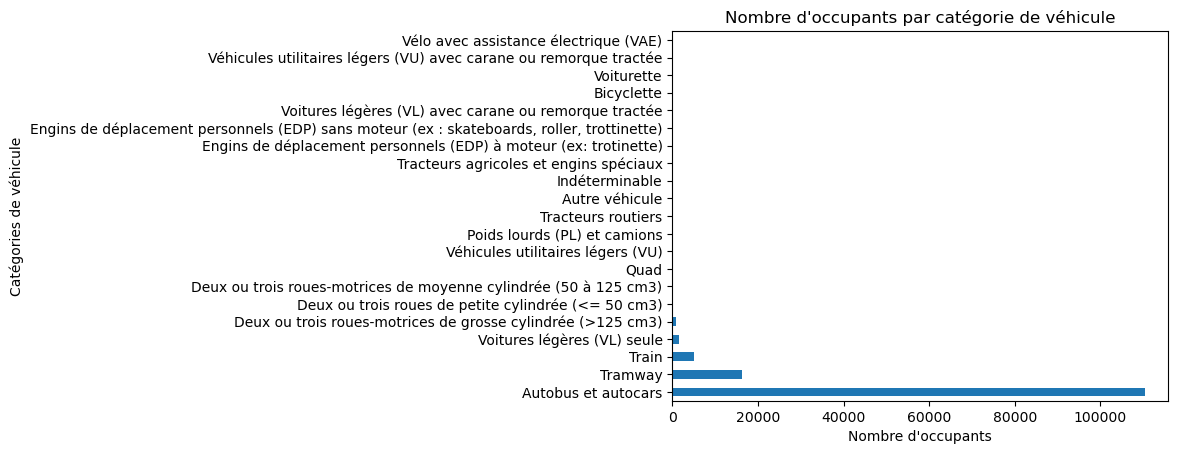

In [ ]:
occupants_counts = vehicule.groupby('catv_Label')['occutc'].sum()

# Tri par catégorie de véhicule et ordre décroissant
occupants_counts = occupants_counts.sort_values(ascending=False)

# Distribution du nombre d'occupants par catégorie de véhicule sous forme de graphe
occupants_counts.plot(kind='barh')  # Utilisation de 'barh' pour obtenir une rotation

plt.title("Nombre d'occupants par catégorie de véhicule")
plt.xlabel("Nombre d'occupants")
plt.ylabel("Catégories de véhicule")

plt.show()



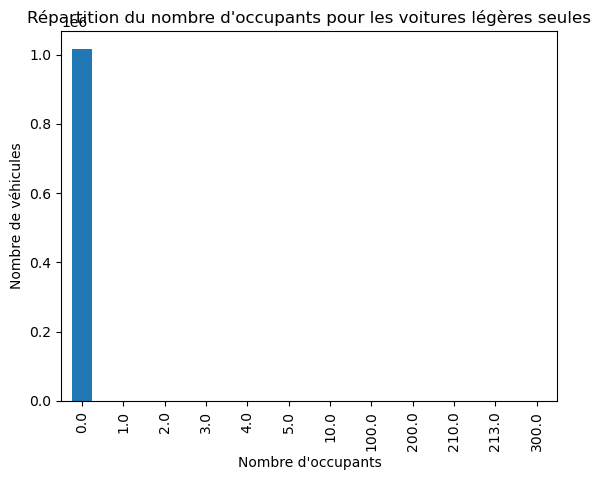

In [ ]:
# Filtre des données pour la catégorie spécifique "'Voitures légères (VL) seule"
filtered_data = vehicule[vehicule['catv_Label'] == 'Voitures légères (VL) seule']

# Calcul du nombre d'occupants pour la catégorie spécifique
occupants_counts = filtered_data['occutc'].value_counts().sort_index()

# Distribution du nombre d'occupants pour la catégorie spécifique sous forme de graphe
occupants_counts.plot(kind='bar')

plt.title("Répartition du nombre d'occupants pour les voitures légères seules")
plt.xlabel("Nombre d'occupants")
plt.ylabel("Nombre de véhicules")

plt.show()


In [ ]:
# Filtre des données pour la catégorie 'Voitures légères (VL) seule'
filtered_data = vehicule[vehicule['catv_Label'] == 'Voitures légères (VL) seule']

# Sélection uniquement de la colonne occutc
occupants_data = filtered_data['occutc']

# Comptage du nombre d'occurrences pour chaque valeur et tri par ordre décroissant
occupants_counts = occupants_data.value_counts().sort_index(ascending=False)

# Affichage de la liste décroissante des valeurs du nombre d'occupants
occupants_counts = occupants_counts.reset_index()
occupants_counts.columns = ['Nombre d\'occupants', 'Nombre de véhicules']
occupants_counts = occupants_counts.sort_values(by='Nombre d\'occupants', ascending=False)
print(occupants_counts)


    Nombre d'occupants  Nombre de véhicules
0                300.0                    1
1                213.0                    1
2                210.0                    1
3                200.0                    3
4                100.0                    2
5                 10.0                    1
6                  5.0                    3
7                  4.0                    1
8                  3.0                    1
9                  2.0                    9
10                 1.0                   32
11                 0.0              1016766
